# Tutorial for analysing non-linear time series with a complex network approach


Written as part of a PhD thesis in Physics by Jonathan F. Donges (donges@pik-potsdam.de) at the Potsdam Institute of Climate Impact Research (PIK) and Humboldt University Berlin,

Copyright 2008-2019.

### Recurrence plot as an approach to analyze complex systems

So far, analysis of complex networks in different scientific fields, has been performed by the study of the adjacency matrix *A<sub>i,j</sub>*. Recent work has been focussing on studying time series using a similar approach by tranforming the time series in a complex network and analyze the phase space and corresponding properties from the **Recurrent plot (RP)**. 

The recurrence matrix can be considered as the adjacency matrix of an undirected, unweighted network. With this approach it is possible to chracterise the local and global properties of a network. 
In particular, this approach can be applied (i) to both univariate and multivariate time series (phase space trajectories), (ii) with and without pronounced oscillatory components and (iii) with as well as without embedding. Moreover, similar to traditional Recurrence Quantitative Analysis (RQA), studying network properties for sliding windows in time also allows for coping with non-stationary time series. Consequently, unlike for most of the existing techniques, there are no fundamental restrictions with respect to its practical applicability to arbitrary time series.

For more information regarding background information consult [Norbert Marwan et al,. 2009](https://arxiv.org/abs/0907.3368)
 

### Visualization of a timeseries and its recurrence network

Before we get started, we shall visualize a timeseries based on a three dimensional chaotic oscillator example described by the Lorenz system defined by:

![](https://latex.codecogs.com/svg.image?\frac{d}{dt}(x,y,z)=&space;(10(y&space;-&space;x),&space;x(28&space;-&space;z)&space;-&space;y,&space;xy&space;-&space;\frac{8}{3}z))

The following figures graphically represents the timeseries in phase space and what its respective recurrent plot looks like. 

![Recurrence Plot](img/REcurrencePlot_v2.png)


($A$) A state at time *i* (red dot) is recurrent at another time *j* (black dot) when the phase space trajectory visits its close neighborhood (gray circle). This is marked by value 1 in the recurrence matrix at *(i, j)*. States outside of this neighborhood (small red circle) are marked with 0 in the recurrence matrix. ($B$) Graphical representation of the corresponding recurrence matrix (recurrence plot) and adjacency matrix (modulo main diagonal).

For Literature review and background information see [Reik V Donner et al,. 2010](https://www.researchgate.net/figure/Basic-concepts-beyond-recurrence-plots-and-the-resulting-recurrence-networks-exemplified_fig1_47557940) .


### Correspondence between recurrent network and phase space measurements

The following table shows how some of the correponding characterisitics measured from a recurrence network translate into phase space features of the time series.

For more background information consult [Donges et al., 2012](https://www.researchgate.net/publication/225288426_Analytical_framework_for_recurrence_network_analysis_of_time_series)


| Scale | Recurrence Network | Phase space interpretation |
| :--- | :--- | :--- |
| Local | Continuous local $\epsilon$-clustering coefficient *C* <br/>  Continuous $\epsilon$-matching index | Local dimension <br/> Local density gradient | 
| Global | Continuous $\epsilon$-transitivity <br/>  Continuous global $\epsilon$-clustering <br/> | Global dimension <br/> Average local dimension | 





## Calculating properties of a time series by recurrence network analysis using toy example


First we import all necessary packages


In [34]:
import numpy as np
import pylab
import math
import matplotlib.pyplot as plt
#from pyunicorn.core import Network
from pyunicorn.timeseries import RecurrenceNetwork
from pyunicorn.timeseries import RecurrencePlot
from pyunicorn.core import Network

Creating a toy nonlinear time series using a logistic map function.

In [3]:
def logistic_map(x0, r, T):
    """
    Returns a time series of length T using the logistic map
    x_(n+1) = r*x_n(1-x_n) at parameter r and using the initial condition x0.

    INPUT: x0 - Initial condition, 0 <= x0 <= 1
            r - Bifurcation parameter, 0 <= r <= 4
            T - length of the desired time series
    TODO: Cythonize
    """
    #  Initialize the time series array
    timeSeries = np.empty(T)

    timeSeries[0] = x0
    for i in range(1, len(timeSeries)):
        xn = timeSeries[i-1]
        timeSeries[i] = r * xn * (1 - xn)

    return timeSeries

Parameters to play with: r as the Bifurcation parameter (should be > 3.6) and x<sub>0</sub>  being the initial value and T the length of time series. 

In [4]:
#  Parameters of logistic map
r = 3.679  # Bifurcation parameter
x0 = 0.7   # Initial value

#  Length of the time series
T = 150

Text(0, 0.5, '$x_n$')

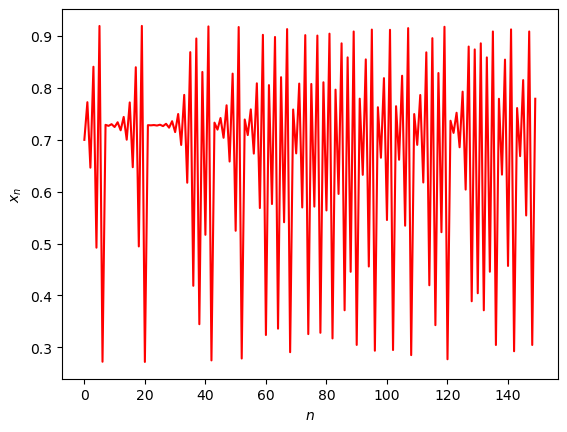

In [5]:
#Generate the timeseries

time_series = logistic_map(x0, r, T)
#  Plot the time series
pylab.plot(time_series, "r")
#  You can include LaTex labels...
pylab.xlabel("$n$")
pylab.ylabel("$x_n$")

Then we create the recurrence plot from the created time series with the RecurrenePlot Class from pyunicorn

Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...


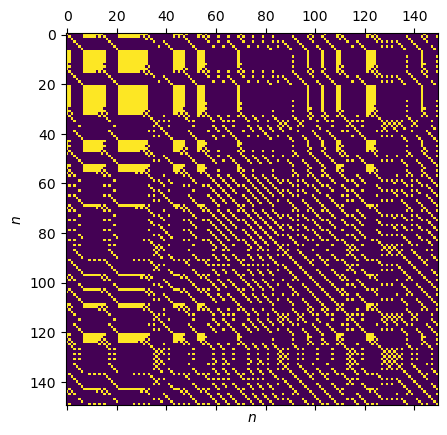

In [6]:
#  Settings for the embedding
DIM = 1  # Embedding dimension
TAU = 0  # Embedding delay

# Distance metric in phase space ->
# Possible choices ("manhattan","euclidean","supremum")
METRIC = "supremum"

EPS = 0.05  # Fixed recurrence threshold 

rp = RecurrencePlot(time_series, dim=DIM, tau=TAU, metric=METRIC,
                    normalize=False, threshold=EPS)

pylab.matshow(rp.recurrence_matrix())
pylab.xlabel("$n$")
pylab.ylabel("$n$")
pylab.show()

Some of the main properties of a recurrence plot can be easily extracted by applying the `rqa_summary()` function

In [7]:
print(rp.rqa_summary())

{'RR': 0.18284444444444445, 'DET': 0.7951564076670152, 'L': 4.329670329610856, 'LAM': 0.3180160466804814}


Now we can use the recurrence properties, which mimic the phase space properties of the time series to calculate quantitative characteristics of the time series implicitly. We shall distinghuish here between local, intermediate and global properties. To construct the complex network we use the RecurrenceNetwork Class combining the RecurrencePlot and Network (see Class Network from pyunicorn/core) charactistics. For more information on the individual properties see https://iopscience.iop.org/article/10.1088/1367-2630/12/3/033025/meta . 

The main focus will lie on determining the local and global clustering coefficient as well as the network transitivity. 

Using the toy problem of the logistic map :

In [8]:
#RR gives the percentage of black dots in the recurrence plot (see Figure B).
RR = rp.recurrence_rate()
print("Recurrence rate:", RR)

rn = RecurrenceNetwork(time_series, dim=DIM, tau=TAU, metric=METRIC,
                       normalize=False, recurrence_rate=RR)

Recurrence rate: 0.18284444444444445
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...


### Local scale network properties

The local scale network properties consider only the direct neighbourhood within a defined $\epsilon$-ball  of a vertex *v*

#### Local clustering coefficient

The local clustering coefficient of a vertex *v*, *C<sub>v</sub>*, characterizes the density of connections in the direct neighbourhood of this vertex in terms of the density of connections between all vertices that are incident with *v*.

We consider the the clustering coefficient by Watts and Strogatz:

![](https://latex.codecogs.com/svg.image?C_v&space;=&space;\frac{2}{k_v(k_v&space;-&space;1)}N^\Delta&space;_v)

whereby *N<sub>v</sub>* represents the number of closed triangles including vertex *v* and *k<sub>v</sub>* stands for the local recurrence rate around a vertex *v*.

In [9]:
LCC = rn.local_clustering()  #rn being the recurrence network
#print("Local clustering coefficient:", LC)

Calculating local clustering coefficients...


### Global scale network properties

Global scale network properties take all vertices into account.

#### Global clustering coefficient

The global clustering coefficient is considered as the average value of the clustering coefficient taken over all vertices of a network expressed by:

![](https://latex.codecogs.com/svg.image?C&space;=&space;\frac{1}{N}\sum_{v=1}^{N}C_v)

In [59]:
GCC = rn.global_clustering()
print("Global clustering coefficient:", GCC)

Global clustering coefficient: 0.7888460554370509


#### Network transitivity

The transivity of a network describes the probability whether from three points *x,y* and *z*, *y* and *z* are closer than $\epsilon$ given they are both closer than $\epsilon$ to *x*. It is described by the $\epsilon$-transivity of a path-connected Lebesgue-measurable subset *S*

![](https://latex.codecogs.com/svg.image?T(\epsilon)&space;=&space;\frac{\left&space;[&space;\int&space;\int&space;\int_{S}^{}d\mu(z)\Theta&space;(\epsilon&space;-&space;\left\|&space;x-y\right\|)&space;x&space;\Theta&space;(\epsilon&space;-&space;\left\|y-z&space;\right\|)\Theta(\epsilon-\left\|&space;z-x\right\|)\right&space;]}{\left&space;[&space;&space;\int&space;\int&space;\int_{S}^{}d\mu(x)d\mu(y)d\mu(y)\Theta&space;(\epsilon&space;-&space;\left\|&space;x-y\right\|)&space;x&space;\Theta(\epsilon-&space;\left\|&space;z-x\right\|)\right&space;]})

In [77]:
T = rn.transitivity()
print("Transitivity:", T)

Transitivity: 0.7964158061953932


# Calculating properties of a time series by recurrence network analysis using Lorenz attractor example

In this example we will be using a complex chaotic system to calculte recurrence network properties from it: The Lorenz attractor. Deifned by the equation:
![](https://latex.codecogs.com/svg.image?\frac{d}{dt}(x,&space;y,&space;z)&space;=&space;\left&space;(&space;10(y&space;-&space;x)&space;\right(28&space;-&space;z),&space;xy&space;-&space;\frac{8}{3}z))

In [12]:
def lorenz(x, y, z, s=10, r=28, b=2.667):
    
    """
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    """
    
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    
    return x_dot, y_dot, z_dot

Define number of steps, the delta_t and the starting values to create timeseries of Lorenz attractor

In [44]:
dt = 0.01
num_steps = 10000

# Need one more for the initial values
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

# Set initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
def timeseries():
    for i in range(num_steps):
        x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)
    return xs, ys, zs

(10001,)
(10001,)


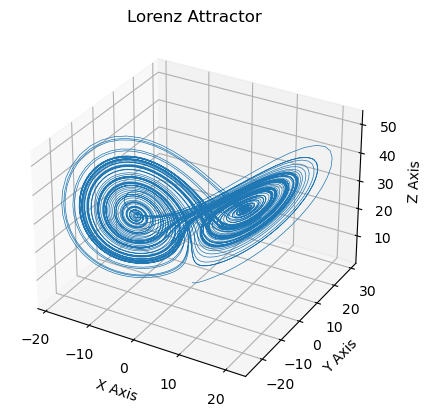

In [45]:
# Plot
ax = plt.figure().add_subplot(projection='3d')
xs, ys, zs = timeseries()
print(np.shape(xs))
print(np.shape(ys))
ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

In [50]:
#Concatenating xs,ys and zs to 3D array
#print(f"Shape of xs.T is", np.shape(xs.T))
xs = xs[:, np.newaxis]
ys = ys[:, np.newaxis]
zs = zs[:, np.newaxis]
print(f"Shape of xs is", np.shape(xs))
print(f"Shape of ys is", np.shape(ys))
print(f"Shape of zs is", np.shape(zs))


stack =  np.concatenate([xs,ys,zs], axis=1)
print(f"Shape of xs is", np.shape(stack))

Shape of xs is (10001, 1)
Shape of ys is (10001, 1)
Shape of zs is (10001, 1)
Shape of xs is (10001, 3)


Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...


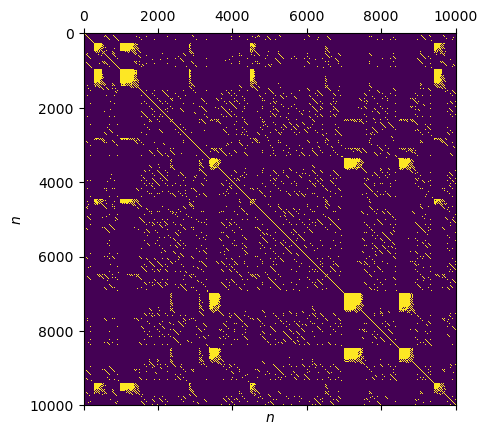

In [51]:
#Displaying recurrence plot for a fixed global recurrence rate of 0.05

Lorenz_rp = RecurrencePlot(stack, metric = "supremum", recurrence_rate=0.05) #Use metric supremum 
pylab.matshow(Lorenz_rp.recurrence_matrix())
pylab.xlabel("$n$")
pylab.ylabel("$n$")
pylab.show()

#### Local clustering coefficient

Calculate local clustering coefficient and dimension of generated Lorenz timeseries and visualize Result on plot

In [52]:
#First apply RecurrenceNetwork class from pyunicorn to generated timeseries
Lorenz_rn = RecurrenceNetwork(stack,  metric = "supremum", recurrence_rate=0.05)

Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...


In [53]:
#Apply local_clustering function to stack to get local clustering coefficient (LCC)
Lorenz_LCC = Lorenz_rn.local_clustering() 
print(Lorenz_LCC)

Calculating local clustering coefficients...
[1.         1.         1.         ... 0.5930939  0.60447036 0.59719857]


From the local clustering coefficient we can calculate the local clustering dimension (LCD) by taking the log of the local clustering coefficient and dividing it by log (3/4)

![](https://latex.codecogs.com/svg.image?LCD&space;=&space;\frac{log(LCC)}{log(\frac{3}{4})})

In [62]:
LCD = np.log10(Lorenz_LCC)/np.log10(3/4)

/home/lschmidt/miniconda3/envs/pyunicorn/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


Plotting sequence


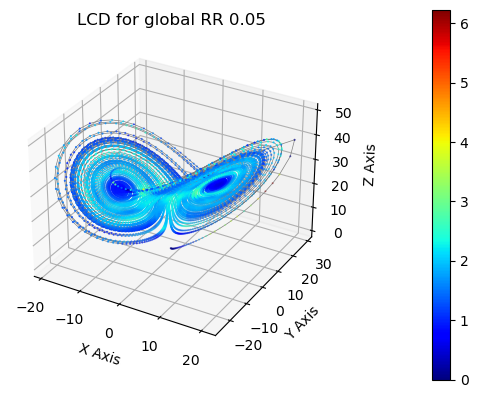

In [68]:
#Plot clustering dimension on Lorenz attractor

LCD[LCD == -0.00] = 0  #Load Local clustering dimension from before into cell

LCD_dim = LCD[:, np.newaxis] 

total_stack = np.concatenate([stack, LCD_dim], axis = 1)
total_stack = total_stack[~np.isinf(total_stack).any(axis=1)] #Get rid of the infinite value rows 

xr, yr, zr = total_stack[:,0], total_stack[:,1], total_stack[:, 2] #Define x,y,z coordinates from stack

dim_labels = total_stack[:,3] #Define dim labels to plot as different colors


print(f"Plotting sequence")
cm = plt.cm.get_cmap('jet')
ax = plt.figure().add_subplot(projection='3d')

#Define one scatter plot to get underlying trajectory
ax.plot(xr.flatten(order='C'),yr.flatten(order='C'),zr.flatten(order='C'), lw=0.5, color="grey")
#Define another scatter plot to define dimensions on Lornez attractor
scat_plot = ax.scatter(xr.flatten(order='C'), yr.flatten(order='C'), zr.flatten(order='C'), lw=0.5, c=dim_labels, s=1, cmap=cm)
cb = plt.colorbar(scat_plot, pad=0.2)

ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")

ax.set_title("LCD for global RR 0.05")
plt.show()


#### Global clustering coefficient

Here, we can calculate the global clustering coefficient and dimension of the generated Lorenz timeseries and visualize the results on plot

In [71]:
#Apply global_clustering function to stack to get global clustering coefficient (GCC)
Lorenz_GCC = Lorenz_rn.local_clustering()

From the global clustering coefficient we can calculate the global clustering dimension (GCD) by taking the log of the global clustering coefficient and dividing it by log (3/4)

![](https://latex.codecogs.com/svg.image?GCD&space;=&space;\frac{log(GCC)}{log(\frac{3}{4})})

In [72]:
GCD = np.log10(Lorenz_GCC)/np.log10(3/4)
print(GCD)

[-0.         -0.         -0.         ...  1.81590231  1.74985754
  1.79192815]


/home/lschmidt/miniconda3/envs/pyunicorn/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


Plotting sequence


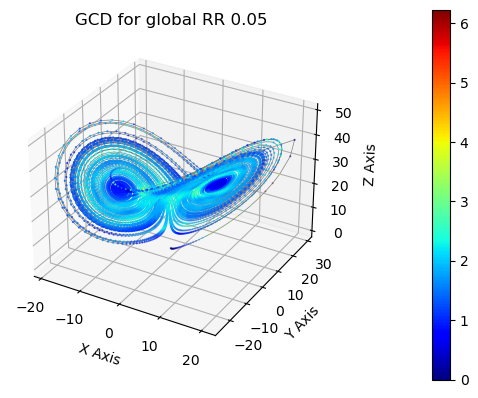

In [73]:
#Plot global clustering dimension on Lorenz attractor

GCD[GCD == -0.00] = 0  #Load Local clustering dimension from before into cell

GCD_dim = GCD[:, np.newaxis] 

total_stack = np.concatenate([stack, GCD_dim], axis = 1)
total_stack = total_stack[~np.isinf(total_stack).any(axis=1)] #Get rid of the infinite value rows 

xr, yr, zr = total_stack[:,0], total_stack[:,1], total_stack[:, 2] #Define x,y,z coordinates from stack

dim_labels = total_stack[:,3] #Define dim labels to plot as different colors


print(f"Plotting sequence")
cm = plt.cm.get_cmap('jet')
ax = plt.figure().add_subplot(projection='3d')

#Define one scatter plot to get underlying trajectory
ax.plot(xr.flatten(order='C'),yr.flatten(order='C'),zr.flatten(order='C'), lw=0.5, color="grey")
#Define another scatter plot to define dimensions on Lornez attractor
scat_plot = ax.scatter(xr.flatten(order='C'), yr.flatten(order='C'), zr.flatten(order='C'), lw=0.5, c=dim_labels, s=1, cmap=cm)
cb = plt.colorbar(scat_plot, pad=0.2)

ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")

ax.set_title("GCD for global RR 0.05")
plt.show()


#### Transitivity

Finally we can also calculate the transitivity and its corresponding dimension of generated Lorenz timeseries and visualize the results on a plot

In [76]:
#Apply transitivity function to stack to get transitivitys
Lorenz_T = Lorenz_rn.transitivity() 
print(Lorenz_T)

0.6998331814058485


From the transitivity we can calculate the transitivity dimension (TD) by taking the log of the transitivity value and dividing it by log (3/4)

![](https://latex.codecogs.com/svg.image?TD&space;=&space;\frac{log(T)}{log(\frac{3}{4})})

In [80]:
TD = np.log10(Lorenz_T)/np.log10(3/4)
print(f"Transitivity dimension is", TD)

Transitivity dimension is 1.2406518125205659


We can also calculate transitivity for different thresholds $\epsilon$ as variable EP 
**Die Kalkulation mit reinnehmen??**

In [12]:
transitivity = []
EPS = np.arange(0.01, 1, 0.01)
# timeseries = xs
dim = 3 # Not needed when 3d timeseries is used 
tau = 30

def trans_func(timeseries):
    for i in range(0, len(EPS)):
        #timeseries = timeseries()[0]
        #dim = 3
        #tau = 30
        Lorenz = RecurrencePlot(timeseries, threshold=EPS[i])
        RR = Lorenz.recurrence_rate()
        RNL = RecurrenceNetwork(timeseries, recurrence_rate=RR)
        item_trans = RNL.transitivity()
        
        #Implement log-version
        log_trans = (np.log(item_trans))/np.log(3/4)
        transitivity.append(log_trans)
    return transitivity

In [13]:
#Transitivity with dt = 0.01

transitivity = trans_func(Lorenz)
print(f"Finish calculating transitivity")

Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating transitivity coefficient (C_1)...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating transitivity coefficient (C_1)...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating transitivity coefficient (C_1)...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...


/tmp/ipykernel_31137/3881939108.py:18: RuntimeWarning: divide by zero encountered in log
  log_trans = (np.log(item_trans))/np.log(3/4)


Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating transitivity coefficient (C_1)...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating transitivity coefficient (C_1)...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating transitivity coefficient (C_1)...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating transitivity coefficient (C_1)...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed rec

Calculating transitivity coefficient (C_1)...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating transitivity coefficient (C_1)...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating transitivity coefficient (C_1)...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating transitivity coefficient (C_1)...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating transitivity coefficient (C_

Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating transitivity coefficient (C_1)...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating transitivity coefficient (C_1)...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating transitivity coefficient (C_1)...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating transitivity coefficient (C_1)...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed rec

Transitivity looks like: [nan, nan, inf, inf, 5.185081100344676, 2.8980920641861623, 2.4345967556829327, 2.2387676822116833, 2.037691367431915, 1.9033175837728127, 1.9012925447045843, 1.9753157021023102, 2.063114664775638, 2.0308548887283697, 1.9957393280697298, 1.9936074237210437, 1.9882704561603812, 1.9478294445006092, 1.949806400206887, 1.9293024799002692, 1.9141195505854645, 1.9074487214479747, 1.9135194873360888, 1.922287957133364, 1.9287127275231613, 1.926237777587291, 1.9311529473880442, 1.9316200718424412, 1.9319449103813793, 1.9278619993168085, 1.9137367659825262, 1.9055091555277797, 1.8971553985640146, 1.896725383364739, 1.8894701991503813, 1.8869385100241423, 1.8835479144299276, 1.8734236555041661, 1.8759294114491796, 1.8725396387735467, 1.8684134792513232, 1.8593620084016231, 1.8581497434260104, 1.8616924172230245, 1.861203672623781, 1.8632519708793989, 1.864446727522026, 1.8626745379995289, 1.8617697436488092, 1.8604093463700258, 1.8593240211846722, 1.8553164990461628, 1.8

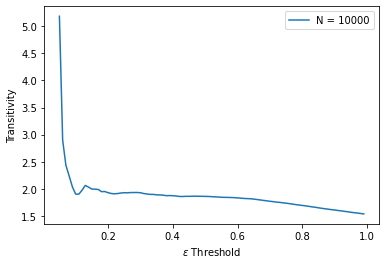

In [26]:
#Plotting the series
print(f"Transitivity looks like:", transitivity)

plt.plot(EPS, transitivity, label= "N = 10000") 
plt.xlabel('$\epsilon$ Threshold')
plt.ylabel('Transitivity')
plt.legend(loc = "upper right")
plt.show()